<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание: генеративно-состязательные сети</center></h2>

# Введение

## MAGIC – Major Atmospheric Gamma Imaging Cherenkov Telescope

MAGIC (Major Atmospheric Gamma Imaging Cherenkov) - это система, состоящая из двух черенковских телескопов диаметром 17 м. Они предназначены для наблюдения гамма-лучей от галактических и внегалактических источников в диапазоне очень высоких энергий (от 30 ГэВ до 100 ТэВ). 

Телескопами MAGIC в настоящее время управляют около 165 астрофизиков из 24 организаций и консорциумов из 12 стран. MAGIC позволил открыть и исследовать новые классы источников гамма-излучения, таких как, например, пульсары и гамма-всплески (GRB).

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/magic1.jpg?raw=1" width="1000"></center>

Источник: https://magic.mpp.mpg.de/

Youtube video: https://youtu.be/mjcDSR2vSU8

## Частицы из космоса

Космические частицы, $\gamma$-кванты (фотоны) и адроны (протоны), взаимодействуют с атмосферой и порождают ливни вторичных частиц. Двигаясь с околосветовой скоростью, эти частицы излучают Черенковское излучение. Телескопы фотографируют это излучение. По фотографиям можно определить тип частицы из космоса: фотон или протон.

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/shower.jpg?raw=1" width="500"></center>

## Фотографии

Задача атмосферного черенковского телескопа - получить изображение ливня путем измерения черенковского света от частиц ливня. Это изображение представляет собой геометрическую проекцию ливня на детектор. Для анализа этих изображений были введены параметры изображения или так называемые параметры Хилласа. Есть два вида параметров изображения: параметры формы и параметры ориентации. (Источник: http://ihp-lx.ethz.ch/Stamet/magic/parameters.html)

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/geo.jpg?raw=1" width="400"></center>

## Фотоны vs адронов

Изображения для $\gamma$-квантов (фотонов) и адронов (протонов) отличаются по форме кластеров. Астрономы используют модели машинного обучения для классификации этих изображений. Для обучения моделей ученые искусственно генерируют такие изображения для каждого типа частиц с помощью сложных физических симуляторов.


<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/gamma_p.png?raw=1" width="600"></center>

## Ускорение симуляции

Сложные физические симуляторы требуют больших вычислительных ресурсов. Они моделируют прилет частиц из космоса, их взаимодействие с атмосферой, рождение ливней, черенковского излучения и работы телескопов для получения изображений. Но мы можем использовать генеративно-состязательные сети для быстрой симуляции!

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Данные

Будем использовать данные телескопа MAGIC из UCI репозитория https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. Каждый объект в данных - параметры одного изображения кластера и метка этого кластера (фотон или адрон):


0. Length: major axis of ellipse [mm]
1. Width: minor axis of ellipse [mm]
2. Size: 10-log of sum of content of all pixels [in #phot]
3. Conc: ratio of sum of two highest pixels over fSize [ratio]
4. Conc1: ratio of highest pixel over fSize [ratio]
5. Asym: distance from highest pixel to center, projected onto major axis [mm]
6. M3Long: 3rd root of third moment along major axis [mm]
7. M3Trans: 3rd root of third moment along minor axis [mm]
8. Alpha: angle of major axis with vector to origin [deg]
9. Dist: distance from origin to center of ellipse [mm]
10. class: g,h # gamma (signal), hadron (background)

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data
path = '/content/drive/My Drive/ColabNotebooks/data/magic04.data'

names = np.array(['Length', 'Width', 'Size', 'Conc', 'Conc1', 'Asym', 'M3Long', 'M3Trans', 'Alpha', 'Dist', 'class'])
data = pd.read_csv(path, header=None)
data.columns = names
data.head()

,Length,Width,Size,Conc,Conc1,Asym,M3Long,M3Trans,Alpha,Dist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


# Постановка задачи

Ваша задача заключается в том, чтобы с помощью генеративно-состязательных сетей научится генерировать параметры кластеров на изображениях телекопа для каждого типа частиц (фотона или адрона):

- $X$ - матрица реальных объектов, которые нужно начиться генерировать;
- $y$ - метки классов, которые будем использовать как условие при генерации.

In [ ]:
# параметры кластеров на изображениях
X = data[names[:-1]].values
X = np.abs(X)

# метки классов
labels = data[names[-1]].values
y = np.ones((len(labels), 1))
y[labels == 'h'] = 0

In [ ]:
# примеры
X[:2]

array([[2.87967e+01, 1.60021e+01, 2.64490e+00, 3.91800e-01, 1.98200e-01,
        2.77004e+01, 2.20110e+01, 8.20270e+00, 4.00920e+01, 8.18828e+01],
       [3.16036e+01, 1.17235e+01, 2.51850e+00, 5.30300e-01, 3.77300e-01,
        2.62722e+01, 2.38238e+01, 9.95740e+00, 6.36090e+00, 2.05261e+02]])

In [ ]:
# примеры
y[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

# Визуализация данных

Каждое изображение описывается 10 параметрами. Давайте построим распделения значений каждого параметра для каждого типа частиц.

In [ ]:
def plot_hists(X1, X2, names, label1, label2, bins=np.linspace(-3, 3, 61)):
    plt.figure(figsize=(4*4, 4*2))
    for i in range(X1.shape[1]):
        plt.subplot(3, 4, i+1)
        plt.hist(X1[:, i], bins=bins, alpha=0.5, label=label1, color='C0')
        plt.hist(X2[:, i], bins=bins, alpha=0.5, label=label2, color='C1')
        plt.xlabel(names[i], size=14)
        plt.legend(loc='best')
    plt.tight_layout()

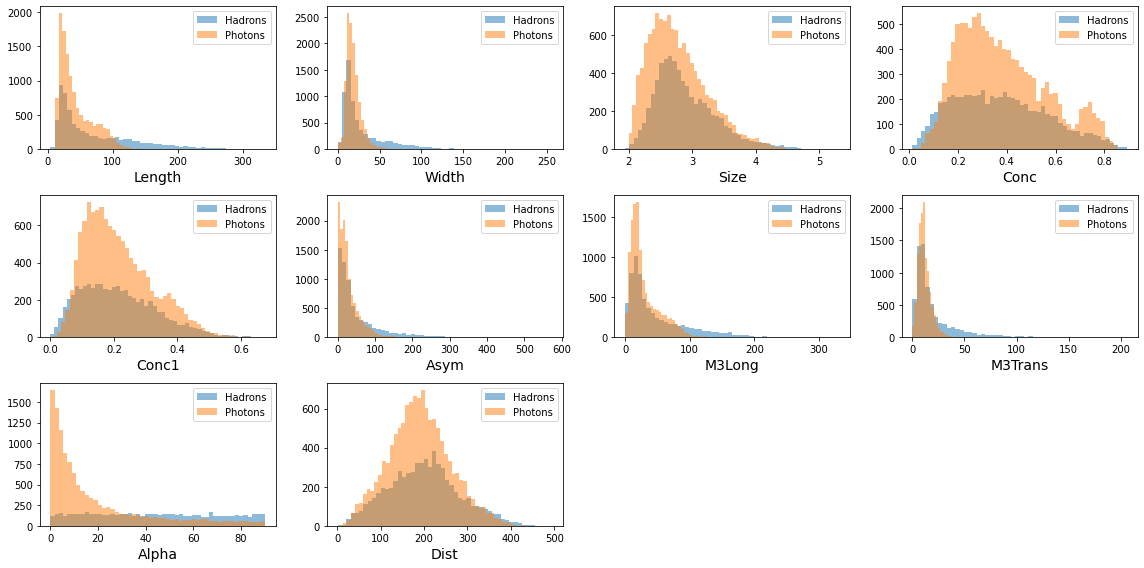

In [ ]:
plot_hists(X[y[:, 0]==0], X[y[:, 0]==1], names, label1="Hadrons", label2="Photons", bins=50)

# Предобработка данных

Из графика видим, что распределения для многих признаков имеют тяжелые хвосты. Это делает обучение генеративных моделей тяжелее. Поэтому, нужно как-то преобразовать данные, чтобы убрать эти тяжелые хвосты. 

## Задание 1 (1 балл)

Используя функцию `sklearn.preprocessing.QuantileTransformer` трансформируйте входные данные `X`. Это преобразование делает так, чтобы распределение каждого параметра было нормальным. Описание функции доступно по ссылке http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html. Используйте значение параметра `output_distribution='normal'`. 

In [ ]:
### YOUR CODE IS HERE ######
from sklearn.preprocessing import QuantileTransformer

rng = np.random.RandomState(0)

qt = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
X_qt = qt.fit_transform(X)

### THE END OF YOUR CODE ###

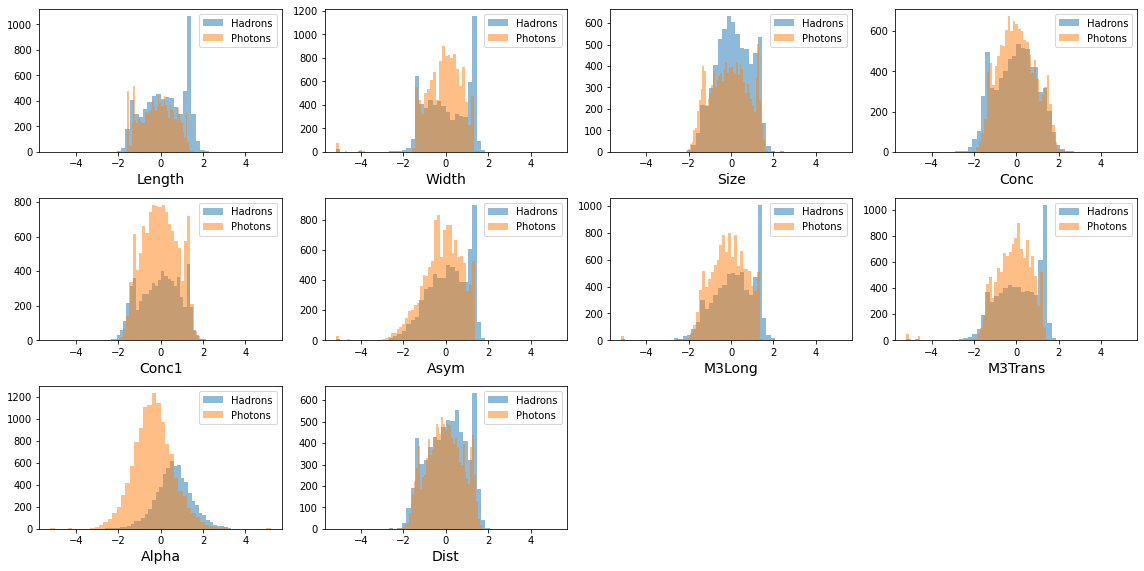

In [ ]:
plot_hists(X_qt[y[:, 0]==0], X_qt[y[:, 0]==1], names, label1="Hadrons", label2="Photons", bins=50)

# Обучающая и тестовая выборки

In [ ]:
from sklearn.model_selection import train_test_split

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X_qt, y, stratify=y, test_size=0.5, shuffle=True, random_state=11)

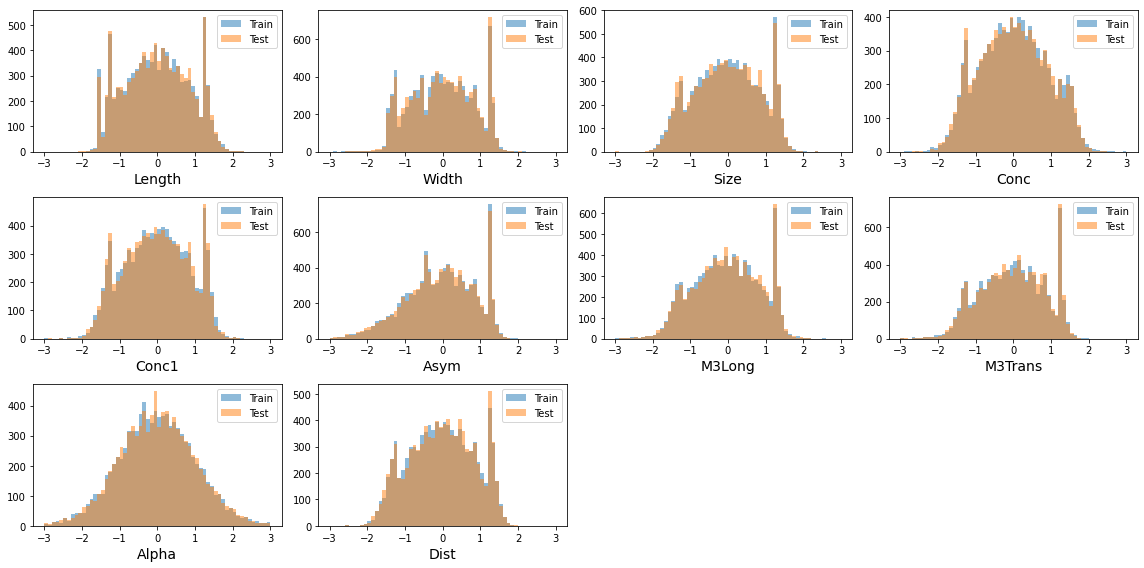

In [ ]:
plot_hists(X_train, X_test, names, label1="Train", label2="Test")

# Conditional WGAN

Мы будем использовать `Conditional WGAN`, который изображен на рисунке. В качестве условия `y` мы будем использовать метку класса: **0** - адрон, **1** - фотон. Таким образом, мы будем сообщать генератору для какой частицы нужно генерировать параметры изображения. 

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/cgan.png?raw=1" width="800"></center>

Генератор $\hat{x} = G(z, y)$ будет принимать на вход шумовой вектор $z$ и вектор условий $y$, а выдавать будет сгенерированный (фейковый) вектор параметров $\hat{x}$. 

Дискриминатор $D(x, y)$ будет принимать на вход вектор параметров $x$ и вектор условий $y$, а возвращать будет рациональное число.

Обучать `Conditional WGAN` будем с такой функцией потерь:

$$L(G, D) = -\frac{1}{n} \sum_{x_i \in X, y_i \in y} D(x_i, y_i) + \frac{1}{n} \sum_{z_i \in Z, y_i \in y} D(G(z_i, y_i), y_i) \to \max_G \min_D$$

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
DEVICE

device(type='cpu')

## Задание 2 (1 балл)

Реализуйте нейронную сеть для генератора со следующими слоями:
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой.

Подсказка: используйте функцию `nn.Sequential()`.

In [ ]:
class Generator(nn.Module):
    
    def __init__(self, n_inputs, n_outputs):

        super(Generator, self).__init__()
        
        ### YOUR CODE IS HERE ######
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs

        self.net = nn.Sequential(
            nn.Linear(self.n_inputs, 100), 
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, self.n_outputs)
        )
        
        ### THE END OF YOUR CODE ###


    def forward(self, z, y):
        zy = torch.cat((z, y), dim=1)
        return self.net(zy)

## Задание 3 (1 балл)

Реализуйте нейронную сеть для дискриминатора со следующими слоями:
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Выходной слой.

Подсказка: используйте функцию `nn.Sequential()`.

In [ ]:
class Discriminator(nn.Module):
    
    def __init__(self, n_inputs):
        super(Discriminator, self).__init__()
        
        ### YOUR CODE IS HERE ######
        self.n_inputs = n_inputs

        self.net = nn.Sequential(
            nn.Linear(self.n_inputs, 100), 
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )
        ### THE END OF YOUR CODE ###

    def forward(self, x, y):

        # set parameter limits
        for p in self.parameters():
          p.data.clamp_(-0.01, 0.01)

        xy = torch.cat((x, y), dim=1)

        return self.net(xy)

## Задание 4 (2 балла)

Реализуйте класс для обучения генеративной модели.

- Подсказка 1: не забывайте ограничивать веса дискриминатора. Для этого используйте `p.data.clamp_(-0.01, 0.01)`, где `p` веса дискриминатора.
- Подсказка 2: `n_critic` - число итераций обучения дискриминатора на одну итерацию обучения генератора.
- Подсказка 3: Используйте `X_tensor = torch.tensor(X_numpy, dtype=torch.float, device=DEVICE)` для перевода numpy в тензор.

In [49]:
class Fitter(object):
    
    def __init__(self, generator, discriminator, batch_size=32, n_epochs=10,
                 latent_dim=1, lr=0.0001, n_critic=5):
        
        self.generator = generator
        self.discriminator = discriminator
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.n_critic = n_critic
        
        self.opt_gen  = torch.optim.RMSprop(self.generator.parameters(), lr=self.lr)
        self.opt_disc = torch.optim.RMSprop(self.discriminator.parameters(), lr=self.lr)
        
        self.generator.to(DEVICE)
        self.discriminator.to(DEVICE)
    
    
    def fit(self, X, y):
        
        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=DEVICE)
        y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)
        
        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)
        
        # Turn on training
        self.generator.train(True)
        self.discriminator.train(True)
        
        self.loss_history = []

        iter_i = 0

        # Fit GAN
        for epoch in range(self.n_epochs):
            for i, (real_batch, cond_batch) in enumerate(
                DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)
                ):
                
                ### YOUR CODE IS HERE ######
                
              real_batch = real_batch.to(DEVICE)
              cond_batch = cond_batch.to(DEVICE)
              
              # generation of new objects
              num_objects = real_batch.shape[0]
              Z_noise = torch.normal(0, 1, (num_objects, self.latent_dim))
              gen_objects = self.generator(Z_noise, cond_batch)

              # score calculating
              real_objects_scores, gen_objects_scores = torch.split(self.discriminator(
                  torch.cat([real_batch, gen_objects], dim=0), 
                  torch.cat([cond_batch, cond_batch], dim=0)), num_objects)

              if iter_i % self.n_critic == 0:
                # generator learning step
                self.opt_gen.zero_grad()
                gen_loss = - torch.mean(gen_objects_scores)
                gen_loss.backward()
                self.opt_gen.step()

              else:
                # discr learning step
                self.opt_disc.zero_grad()
                discr_loss = torch.mean(gen_objects_scores) - torch.mean(real_objects_scores)
                discr_loss.backward()
                self.opt_disc.step()
          
              iter_i += 1

                    
                ### THE END OF YOUR CODE ###
                    
            # caiculate and store loss after an epoch
            Z_noise = torch.normal(0, 1, (len(X_real), self.latent_dim))
            X_fake = self.generator(Z_noise, y_cond)
            loss_epoch = torch.mean(self.discriminator(X_real, y_cond)) - torch.mean(self.discriminator(X_fake, y_cond))
            self.loss_history.append(loss_epoch.detach().cpu())
                    
        # Turn off training
        self.generator.train(False)
        self.discriminator.train(False)

## Обучение
Обучим модель на данных.

In [50]:
%%time
latent_dim = 10
generator     = Generator(n_inputs=latent_dim+y.shape[1], 
                          n_outputs=X_train.shape[1])
discriminator = Discriminator(n_inputs=X_train.shape[1]+y.shape[1])

fitter = Fitter(generator, discriminator, batch_size=50, n_epochs=100, latent_dim=latent_dim, lr=0.0001, n_critic=5)
fitter.fit(X_train, y_train)

CPU times: user 40.2 s, sys: 152 ms, total: 40.4 s
Wall time: 40.9 s


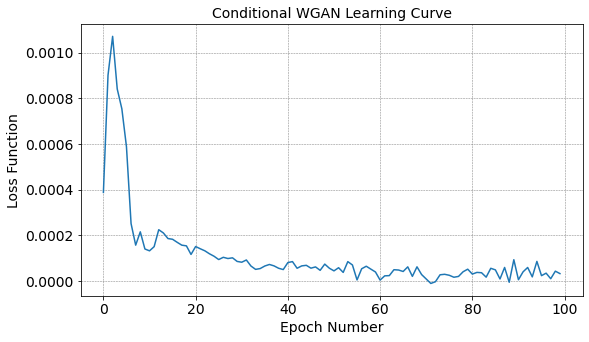

In [51]:
# WGAN learning curve
plt.figure(figsize=(9, 5))
plt.plot(fitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional WGAN Learning Curve", size=14)
plt.grid(b=1, linestyle='--', linewidth=0.5, color='0.5')
plt.show()

## Задание 5 (1 балл)

Реализуйте функцию для генерации новых объектов $X$ по вектору условий $y$.

In [52]:
def generate(generator, y, latent_dim):
    ### YOUR CODE IS HERE ######

    y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)
    Z_noise = torch.normal(0, 1, (len(y), latent_dim))
    X_fake_raw = generator(Z_noise, y_cond)
    X_fake = X_fake_raw.cpu().detach().numpy()

    ### THE END OF YOUR CODE ###
    return X_fake # numpy

Теперь сгенерируем фейковые матрицы `X_fake_train` и `X_fake_test`. Сравним их с матрицами реальных объектов `X_train` и `X_test`

In [53]:
X_fake_train = generate(fitter.generator, y_train, latent_dim)

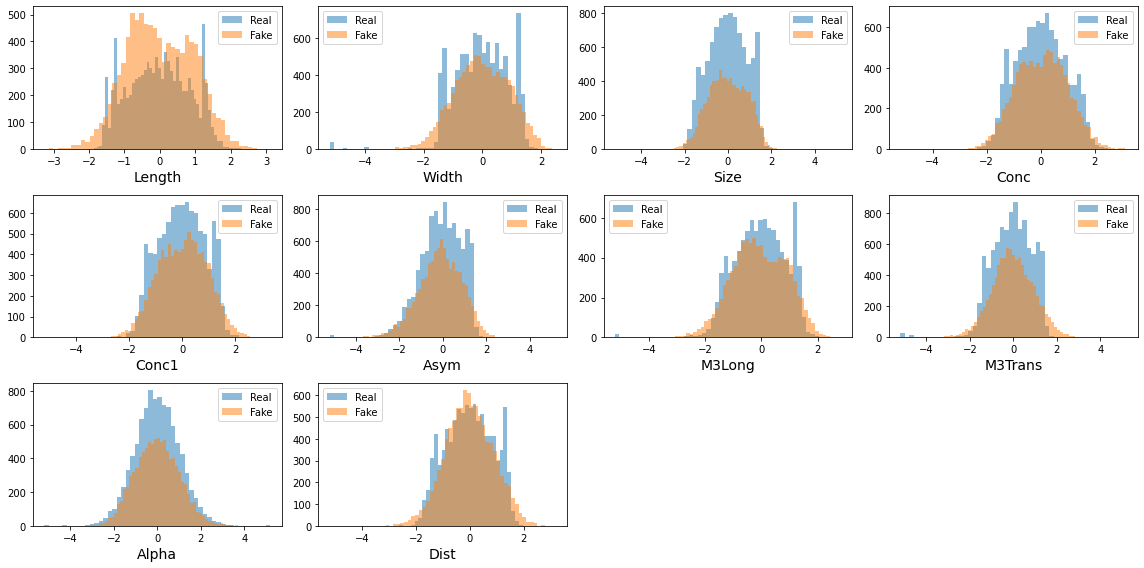

In [54]:
plot_hists(X_train, X_fake_train, names, label1="Real", label2="Fake", bins=50)

In [55]:
X_fake_test = generate(fitter.generator, y_test, latent_dim)

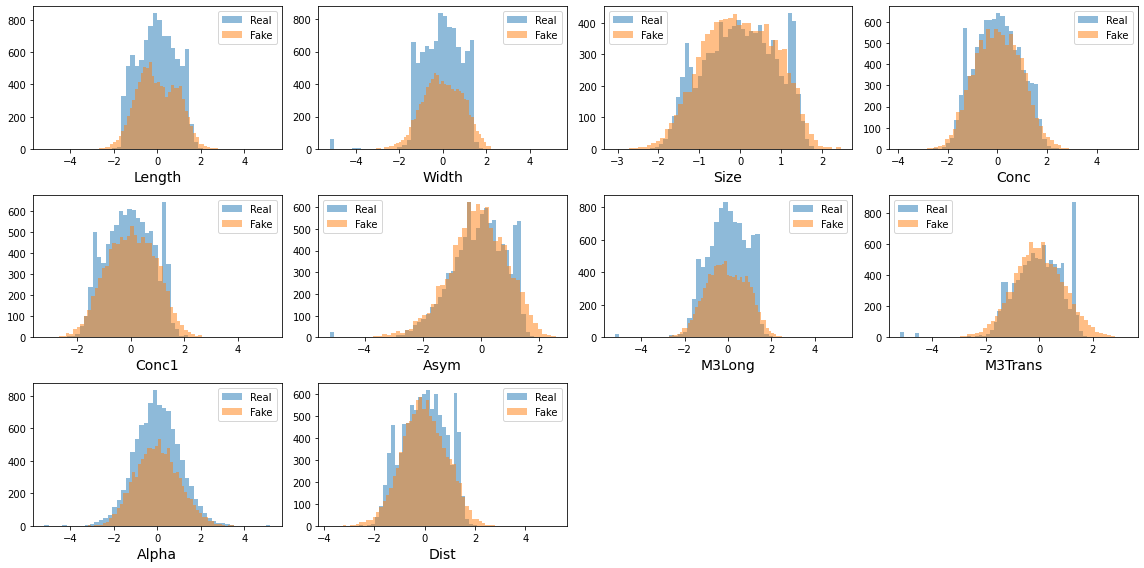

In [56]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

## Вывод 1: 
Визуально мы видим сходство реальных и фейковых данных. Однако это только проекции 10-мерных объектов на одну ось.

# Измерение качества генерации

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/clf.png?raw=1" width="600"></center>

Измерим сходство распределений классификатором.

In [57]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis=0)
XX_test = np.concatenate((X_fake_test, X_test), axis=0)

yy_train = np.array([0]*len(X_fake_train) + [1]*len(X_train))
yy_test = np.array([0]*len(X_fake_test) + [1]*len(X_test))

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [59]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.8018436512122388


## Вывод 2

Идеальное значение ROC AUC равно 0.5. Это соответствует случаю, когда классификатор не может разделить реальные и фейковые данные. В нашем случае ROC AUC около 0.8, что говорит о том, что есть куда улучшать качество генеративной модели :)

# Условные вариационные автокодировщики

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/cvae.svg?raw=1" width="600"></center>

Теперь, решим эту же задачу используя условный автокодировщик (CVAE). Пользуясь вашим семинаром по теме вариационных автокодировщиков выполните следующие задания.

## Задание 6 (1 балл)

Реализуйте нейронную сеть для декодеровщика со следующими слоями:
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- Слой батч-нормализации;
- ReLU функцию активации;
- Выходной слой для mu; Выходной слой для log_sigma;

Подсказка: используйте функцию `nn.Sequential()`.

In [ ]:
class Encoder(nn.Module):
    def __init__(self, n_inputs, lat_size):
        super(Encoder, self).__init__()
        
        ### YOUR CODE IS HERE ######
        self.n_inputs = n_inputs
        self.lat_size = lat_size

        self.enc_net = nn.Sequential(
            nn.Linear(self.n_inputs, 100), 
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.BatchNorm1d(100),
            nn.ReLU()
        )
        
        self.mu = nn.Linear(100, self.lat_size)
        self.log_sigma =nn.Linear(100, self.lat_size)

        ### THE END OF YOUR CODE ###
        
    def forward(self, x, y):
        z = torch.cat((x, y), dim=1)
        z = self.enc_net(z)
        mu = self.mu(z)
        log_sigma = self.log_sigma(z)

        return mu, log_sigma 

## Задание 7 (1 балл)

Реализуйте нейронную сеть для декодеровщика со следующими слоями:
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Полносвязный слой со 100 нейронами;
- ReLU функцию активации;
- Выходной слой.

Подсказка: используйте функцию `nn.Sequential()`.

In [ ]:
class Decoder(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super(Decoder, self).__init__()
        
        ### YOUR CODE IS HERE ######
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs

        self.dec_net = nn.Sequential(
            nn.Linear(self.n_inputs, 100), 
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, self.n_outputs),
        )

        ### THE END OF YOUR CODE ###
        
    def forward(self, z, y):
        z_cond = torch.cat((z, y), dim=1)
        x_rec = self.dec_net(z_cond)

        return x_rec

## Задание 8 (1 балл)

Реализуйте класс для обучения вариационного автокодировщика.

Подсказка: Используйте `X_tensor = torch.tensor(X_numpy, dtype=torch.float, device=DEVICE)` для перевода numpy в тензор.

In [ ]:
class VAEFitter(object):
    
    def __init__(self, encoder, decoder, batch_size=32, n_epochs=10, latent_dim=1,
                 lr=0.0001, KL_weight=0.001):
        
        self.encoder = encoder
        self.decoder = decoder
        self.batch_size = batch_size
        self.n_epochs = n_epochs
        self.latent_dim = latent_dim
        self.lr = lr
        self.KL_weight = KL_weight
        
        self.criterion = nn.MSELoss()
        self.opt  = torch.optim.RMSprop(list(self.encoder.parameters()) + list(self.decoder.parameters()), lr=self.lr)
        
        self.encoder.to(DEVICE)
        self.decoder.to(DEVICE)
        
        
    def sample_z(self, mu, log_sigma):
        eps = torch.randn(mu.shape).to(DEVICE)
        return mu + torch.exp(log_sigma / 2) * eps
    
    def custom_loss(self, x, rec_x, mu, log_sigma):
        KL = torch.mean(-0.5 * torch.sum(1 + log_sigma - mu ** 2 - log_sigma.exp(), dim = 1), dim = 0)
        recon_loss = self.criterion(x, rec_x) 
        return KL*self.KL_weight + recon_loss
    
    
    def compute_loss(self, x_batch, cond_batch):
        
        ### YOUR CODE IS HERE ######
        mu, log_sigma = self.encoder(x_batch, cond_batch)
        z = self.sample_z(mu, log_sigma)
        rec_x = self.decoder(z, cond_batch)

        loss = self.custom_loss(x_batch, rec_x, mu, log_sigma)

        ### THE END OF YOUR CODE ###
        
        return loss
    
    
    def fit(self, X, y):
        
        # numpy to tensor
        X_real = torch.tensor(X, dtype=torch.float, device=DEVICE)
        y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)
        
        # tensor to dataset
        dataset_real = TensorDataset(X_real, y_cond)
        
        # Turn on training
        self.encoder.train(True)
        self.decoder.train(True)
        
        self.loss_history = []

        # Fit GAN
        for epoch in range(self.n_epochs):
            for i, (x_batch, cond_batch) in enumerate(DataLoader(dataset_real, batch_size=self.batch_size, shuffle=True)):
                
                # caiculate loss
                loss = self.compute_loss(x_batch, cond_batch)
                
                # optimization step
                self.opt.zero_grad()
                loss.backward()
                self.opt.step()
                    
            # caiculate and store loss after an epoch
            loss_epoch = self.compute_loss(X_real, y_cond)
            self.loss_history.append(loss_epoch.detach().cpu())
                    
        # Turn off training
        self.encoder.train(False)
        self.decoder.train(False)

## Обучение
Обучим модель на данных.

In [ ]:
%%time

latent_dim = 10

encoder = Encoder(n_inputs=X_train.shape[1]+y.shape[1], lat_size=latent_dim)
decoder = Decoder(n_inputs=latent_dim+y.shape[1], n_outputs=X_train.shape[1])

vae_fitter = VAEFitter(encoder, decoder, batch_size=50, n_epochs=100, latent_dim=latent_dim, lr=0.001, KL_weight=0.001)
vae_fitter.fit(X_train, y_train)

CPU times: user 46.4 s, sys: 6.29 ms, total: 46.4 s
Wall time: 47.1 s


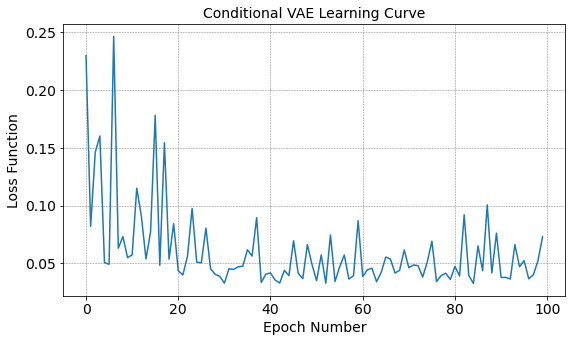

In [ ]:
# CVAE learning curve
plt.figure(figsize=(9, 5))
plt.plot(vae_fitter.loss_history)
plt.xlabel("Epoch Number", size=14)
plt.ylabel("Loss Function", size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title("Conditional VAE Learning Curve", size=14)
plt.grid(b=1, linestyle='--', linewidth=0.5, color='0.5')
plt.show()

Как-то выглядит не очень здорово, но, видимо

## Задание 9 (1 балл)

Реализуйте функцию для генерации новый объектов $X$ по вектору условий $y$.

In [60]:
def generate(decoder, y, latent_dim):
    ### YOUR CODE IS HERE ######

    y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)
    Z_noise = torch.normal(0, 1, (len(y), latent_dim))
    X_fake_raw = decoder(Z_noise, y_cond)
    X_fake = X_fake_raw.cpu().detach().numpy()

    ### THE END OF YOUR CODE ###
    return X_fake # numpy

Теперь сгенерируем фейковые матрицы `X_fake_train` и `X_fake_test`. Сравним их с матрицами реальных объектов `X_train` и `X_test`

In [61]:
X_fake_train = generate(vae_fitter.decoder, y_train, latent_dim)

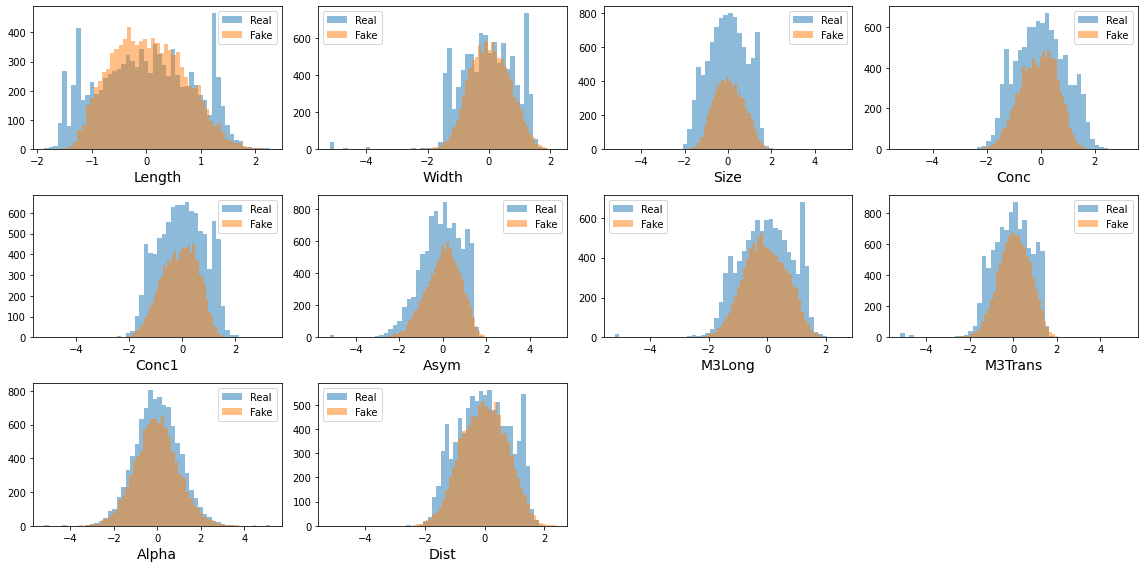

In [62]:
plot_hists(X_train, X_fake_train, names, label1="Real", label2="Fake", bins=50)

In [63]:
X_fake_test = generate(vae_fitter.decoder, y_test, latent_dim)

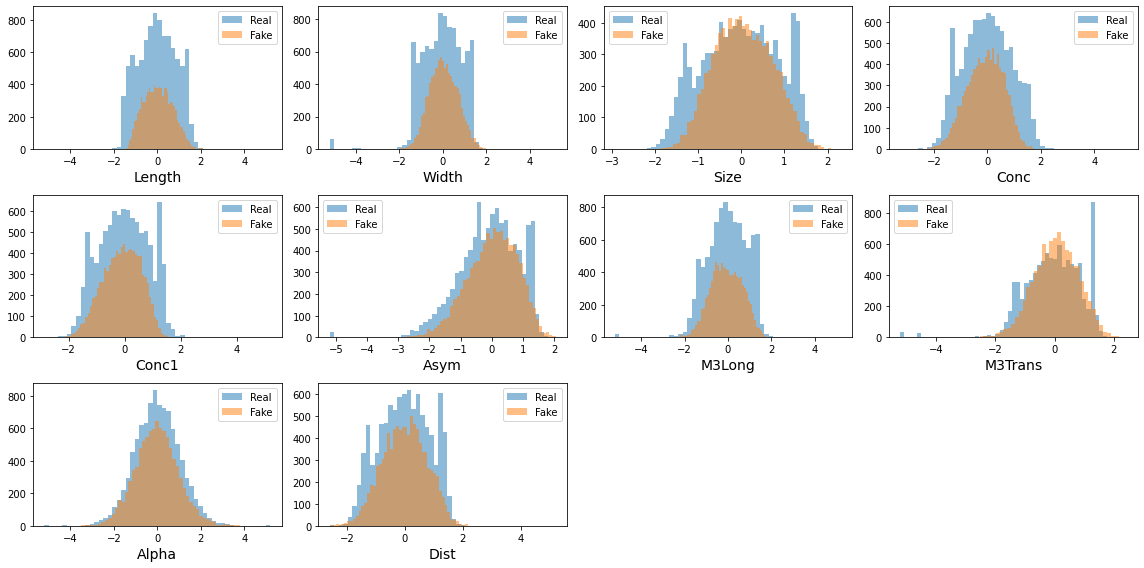

In [64]:
plot_hists(X_test, X_fake_test, names, label1="Real", label2="Fake", bins=50)

# Измерение качества генерации

Измерим сходство распределений классификатором.

In [65]:
# собираем реальный и фейковые матрицы в одну
XX_train = np.concatenate((X_fake_train, X_train), axis=0)
XX_test = np.concatenate((X_fake_test, X_test), axis=0)

yy_train = np.array([0]*len(X_fake_train) + [1]*len(X_train))
yy_test = np.array([0]*len(X_fake_test) + [1]*len(X_test))

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

# обучаем классификатор
clf = GradientBoostingClassifier()
clf.fit(XX_train, yy_train)

# получаем прогнозы
yy_test_proba = clf.predict_proba(XX_test)[:, 1]

In [67]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(yy_test, yy_test_proba)
print("ROC AUC = ", auc)

ROC AUC =  0.7900598462407715


## Вывод 3

Для CVAE получили ROC AUC около 0.8 (меньше, лучше, конечно). Таким образом видим, что в данной задаче обе модели ведут себя схожим образом. Но может их можно как-то улучшить? Или есть какая-то еще модель? :)

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/mem1.jpg?raw=1" width="500"></center>

<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/mem2.jpg?raw=1" width="500"></center>

# Бонус (0 баллов)

Попробуйте настроить параметры обучения каждой модели или еще как-нибудь их улучшить, чтобы получить как можно меньший ROC AUC. Что получилось? Какая модель лучше? 

#### Пробуем с CVAE

In [68]:
%%time 

latent_dim = 10

for batch_size in [64, 100, 128, 256]:
  # training
  encoder = Encoder(n_inputs=X_train.shape[1]+y.shape[1], lat_size=latent_dim)
  decoder = Decoder(n_inputs=latent_dim+y.shape[1], n_outputs=X_train.shape[1])

  vae_fitter = VAEFitter(encoder, decoder, batch_size, n_epochs=100, latent_dim=latent_dim, lr = 0.001, KL_weight=0.001)
  vae_fitter.fit(X_train, y_train)

  # fake matrix creating 
  X_fake_train = generate(vae_fitter.decoder, y_train, latent_dim)

  # concatenating
  XX_train = np.concatenate((X_fake_train, X_train), axis=0)
  XX_test = np.concatenate((X_fake_test, X_test), axis=0)

  yy_train = np.array([0]*len(X_fake_train) + [1]*len(X_train))
  yy_test = np.array([0]*len(X_fake_test) + [1]*len(X_test))

  # classifier
  clf = GradientBoostingClassifier()
  clf.fit(XX_train, yy_train)

  # получаем прогнозы
  yy_test_proba = clf.predict_proba(XX_test)[:, 1]

  auc = roc_auc_score(yy_test, yy_test_proba)
  print("Batch size = ", batch_size)
  print("ROC AUC = ", auc)

Batch size =  64
ROC AUC =  0.7680947831769314
Batch size =  100
ROC AUC =  0.7521338543411606
Batch size =  128
ROC AUC =  0.725814887422725
Batch size =  256
ROC AUC =  0.7045204616093967
CPU times: user 2min 40s, sys: 539 ms, total: 2min 40s
Wall time: 2min 45s


In [70]:
for batch_size in [300, 350, 400, 512]:
  # training
  encoder = Encoder(n_inputs=X_train.shape[1]+y.shape[1], lat_size=latent_dim)
  decoder = Decoder(n_inputs=latent_dim+y.shape[1], n_outputs=X_train.shape[1])

  vae_fitter = VAEFitter(encoder, decoder, batch_size, n_epochs=100, latent_dim=latent_dim, lr = 0.001, KL_weight=0.001)
  vae_fitter.fit(X_train, y_train)

  # fake matrix creating 
  X_fake_train = generate(vae_fitter.decoder, y_train, latent_dim)

  # concatenating
  XX_train = np.concatenate((X_fake_train, X_train), axis=0)
  XX_test = np.concatenate((X_fake_test, X_test), axis=0)

  yy_train = np.array([0]*len(X_fake_train) + [1]*len(X_train))
  yy_test = np.array([0]*len(X_fake_test) + [1]*len(X_test))

  # classifier
  clf = GradientBoostingClassifier()
  clf.fit(XX_train, yy_train)

  # получаем прогнозы
  yy_test_proba = clf.predict_proba(XX_test)[:, 1]

  auc = roc_auc_score(yy_test, yy_test_proba)
  print("Batch size = ", batch_size)
  print("ROC AUC = ", auc)

Batch size =  300
ROC AUC =  0.7371310513809692
Batch size =  350
ROC AUC =  0.689017133992554
Batch size =  400
ROC AUC =  0.730587831061664
Batch size =  512
ROC AUC =  0.7124010643508798


Корректировка batch size помогает CVAE, однако после 350 уже хуже, зафиксируем 350. Поварьируем learning rate:

In [74]:
for lr in [0.05, 0.01, 0.005, 0.001, 0.0005]:
  # training
  encoder = Encoder(n_inputs=X_train.shape[1]+y.shape[1], lat_size=latent_dim)
  decoder = Decoder(n_inputs=latent_dim+y.shape[1], n_outputs=X_train.shape[1])

  vae_fitter = VAEFitter(encoder, decoder, lr = lr, batch_size=350, n_epochs=100, latent_dim=latent_dim, KL_weight=0.001)
  vae_fitter.fit(X_train, y_train)

  # fake matrix creating 
  X_fake_train = generate(vae_fitter.decoder, y_train, latent_dim)

  # concatenating
  XX_train = np.concatenate((X_fake_train, X_train), axis=0)
  XX_test = np.concatenate((X_fake_test, X_test), axis=0)

  yy_train = np.array([0]*len(X_fake_train) + [1]*len(X_train))
  yy_test = np.array([0]*len(X_fake_test) + [1]*len(X_test))

  # classifier
  clf = GradientBoostingClassifier()
  clf.fit(XX_train, yy_train)

  # получаем прогнозы
  yy_test_proba = clf.predict_proba(XX_test)[:, 1]

  auc = roc_auc_score(yy_test, yy_test_proba)
  print("Learning rate = ", lr)
  print("ROC AUC = ", auc)

Learning rate =  0.05
ROC AUC =  0.5415814058144561
Learning rate =  0.01
ROC AUC =  0.7256349838180188
Learning rate =  0.005
ROC AUC =  0.7338949426194796
Learning rate =  0.001
ROC AUC =  0.7364880125077261
Learning rate =  0.0005
ROC AUC =  0.7042484915430213


Лучший learning rate для данного batch size - 0.05. Здесь мы получили очень хороший AUC ROC, это весьма подозрительно, но ладно.

#### Проверим на CWGAN

In [76]:
def generate_wgan(generator, y, latent_dim):
    ### YOUR CODE IS HERE ######

    y_cond = torch.tensor(y, dtype=torch.float, device=DEVICE)
    Z_noise = torch.normal(0, 1, (len(y), latent_dim))
    X_fake_raw = generator(Z_noise, y_cond)
    X_fake = X_fake_raw.cpu().detach().numpy()

    ### THE END OF YOUR CODE ###
    return X_fake # numpy

In [77]:
for batch_size in [64, 100, 128, 256, 300, 350, 400, 512]:
  # training
  generator     = Generator(n_inputs=latent_dim+y.shape[1], 
                            n_outputs=X_train.shape[1])
  discriminator = Discriminator(n_inputs=X_train.shape[1]+y.shape[1])

  fitter = Fitter(generator, discriminator, batch_size=batch_size, n_epochs=100, latent_dim=latent_dim, lr=0.0001, n_critic=5)
  fitter.fit(X_train, y_train)

  # fake matrix creating 
  X_fake_train = generate_wgan(fitter.generator, y_train, latent_dim)

  # concatenating
  XX_train = np.concatenate((X_fake_train, X_train), axis=0)
  XX_test = np.concatenate((X_fake_test, X_test), axis=0)

  yy_train = np.array([0]*len(X_fake_train) + [1]*len(X_train))
  yy_test = np.array([0]*len(X_fake_test) + [1]*len(X_test))

  # classifier
  clf = GradientBoostingClassifier()
  clf.fit(XX_train, yy_train)

  # получаем прогнозы
  yy_test_proba = clf.predict_proba(XX_test)[:, 1]

  auc = roc_auc_score(yy_test, yy_test_proba)
  print("Batch size = ", batch_size)
  print("ROC AUC = ", auc)

Batch size =  64
ROC AUC =  0.7532383754551354
Batch size =  100
ROC AUC =  0.7433126511359452
Batch size =  128
ROC AUC =  0.7487836921896371
Batch size =  256
ROC AUC =  0.736686668855961
Batch size =  300
ROC AUC =  0.7202992146182944
Batch size =  350
ROC AUC =  0.7400057496619309
Batch size =  400
ROC AUC =  0.7296032788552865
Batch size =  512
ROC AUC =  0.7208669992624952


Здесь особой разницы не видно, однако наилучий результат при 300, поэтому зафиксируем это значение.

In [78]:
for lr in [0.05, 0.01, 0.005, 0.001, 0.0005]:
  # training
  generator     = Generator(n_inputs=latent_dim+y.shape[1], 
                            n_outputs=X_train.shape[1])
  discriminator = Discriminator(n_inputs=X_train.shape[1]+y.shape[1])

  fitter = Fitter(generator, discriminator, batch_size=300, n_epochs=100, latent_dim=latent_dim, lr=lr, n_critic=5)
  fitter.fit(X_train, y_train)

  # fake matrix creating 
  X_fake_train = generate_wgan(fitter.generator, y_train, latent_dim)

  # concatenating
  XX_train = np.concatenate((X_fake_train, X_train), axis=0)
  XX_test = np.concatenate((X_fake_test, X_test), axis=0)

  yy_train = np.array([0]*len(X_fake_train) + [1]*len(X_train))
  yy_test = np.array([0]*len(X_fake_test) + [1]*len(X_test))

  # classifier
  clf = GradientBoostingClassifier()
  clf.fit(XX_train, yy_train)

  # получаем прогнозы
  yy_test_proba = clf.predict_proba(XX_test)[:, 1]

  auc = roc_auc_score(yy_test, yy_test_proba)
  print("Learning rate = ", lr)
  print("ROC AUC = ", auc)

Learning =  0.05
ROC AUC =  0.5339962140687593
Learning =  0.01
ROC AUC =  0.700736094940187
Learning =  0.005
ROC AUC =  0.7228000245466336
Learning =  0.001
ROC AUC =  0.7558095137002281
Learning =  0.0005
ROC AUC =  0.7399442227507489


В данном случае видно, что learning rate = 0.05 поакзывает большую эффективность и для WGAN.

Глобально, два подхода незначительно отличаются по времени и счету, где WGAN показывает немного лучшие результаты.